In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
len(df)

891

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

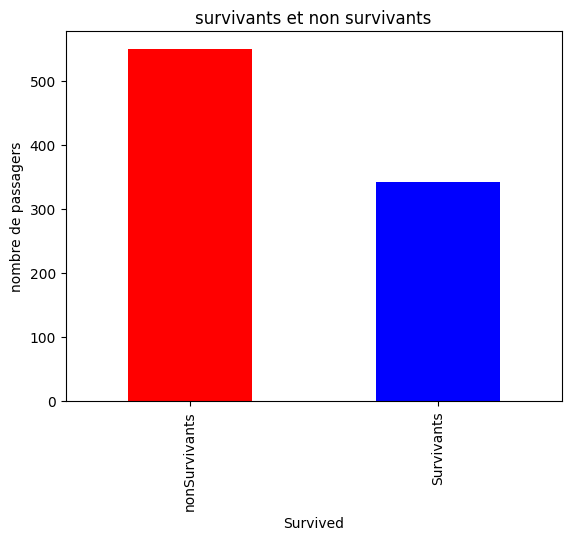

In [6]:
survivants = df["Survived"].value_counts()
survivants.plot(kind="bar", color =["red", "blue"])
plt.title("survivants et non survivants")
plt.ylabel("nombre de passagers")
plt.xticks(ticks=[0,1], labels=["nonSurvivants", "Survivants"])
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

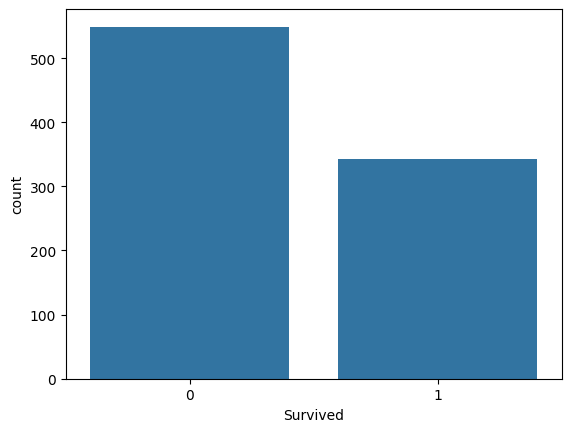

In [7]:
sns.countplot(x = "Survived", data = df)

<Axes: xlabel='Survived', ylabel='count'>

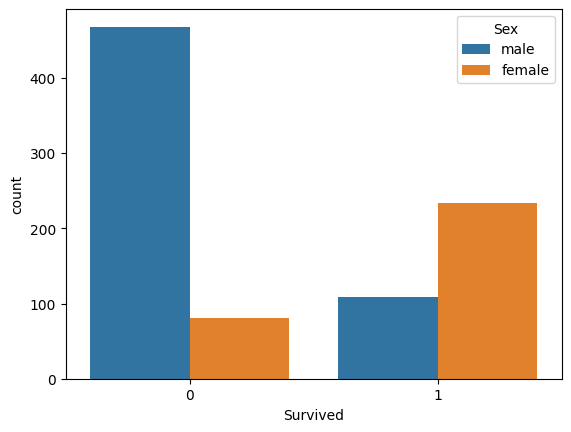

In [8]:
sns.countplot(x = "Survived", data = df, hue = "Sex")

<Axes: xlabel='Survived', ylabel='count'>

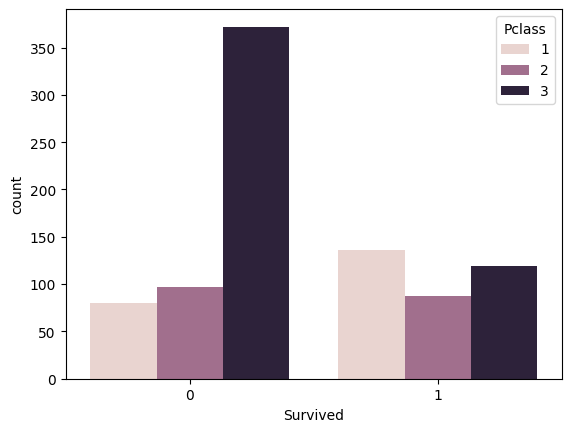

In [9]:
sns.countplot(x = "Survived", data = df, hue = "Pclass")

<Axes: xlabel='Survived', ylabel='count'>

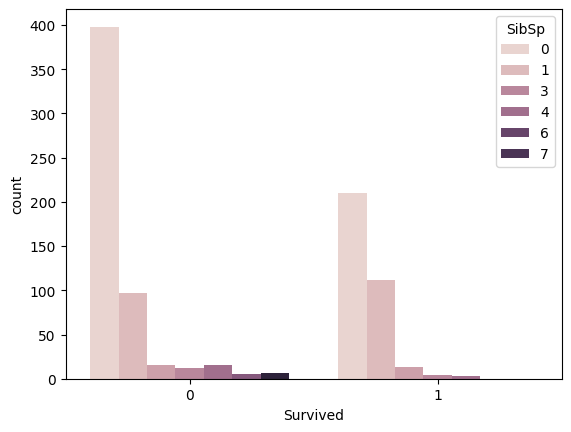

In [10]:
sns.countplot(x = "Survived", data = df, hue = "SibSp")

In [11]:
accompagnes = (df["SibSp"] >= 1).sum()
accompagnes

283

In [12]:
nonAccompagnes = (df["SibSp"]==0).sum()
nonAccompagnes

608

<Axes: xlabel='Survived', ylabel='count'>

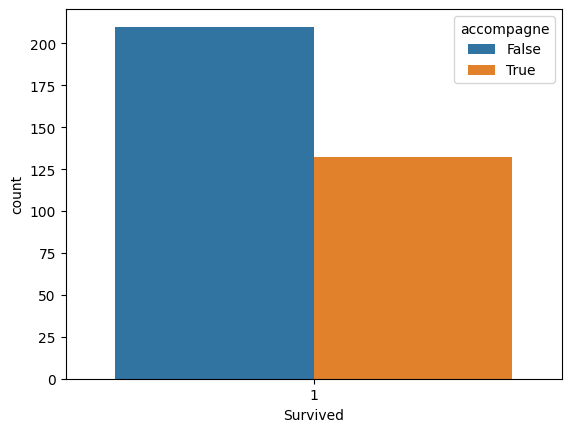

In [13]:
survi = df[df["Survived"] == 1].copy()
survi["accompagne"]=survi["SibSp"]>0
sns.countplot(x = "Survived", data = survi, hue = "accompagne")

In [15]:
survivantsAge = df.groupby("Age")["Survived"].sum().reset_index()
# le reset_index() c pour le transformer en dataframe
survivantsAge

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
...,...,...
83,70.00,0
84,70.50,0
85,71.00,0
86,74.00,0


<Axes: xlabel='Age', ylabel='Survived'>

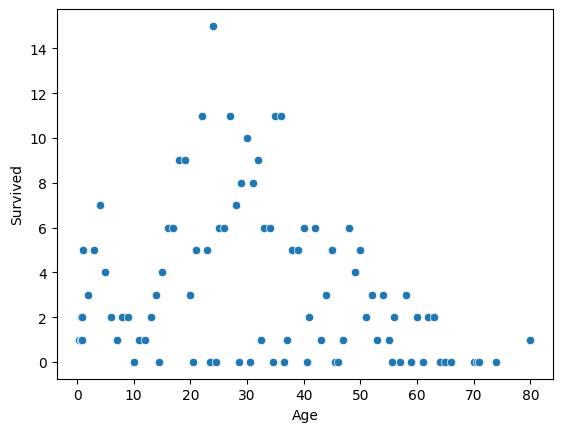

In [16]:
sns.scatterplot(x = "Age", y = "Survived", data = survivantsAge)

<Axes: xlabel='Age', ylabel='Survived'>

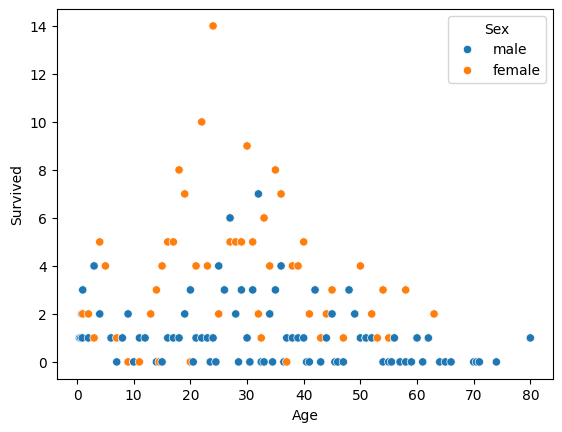

In [17]:
survivantsAge = df.groupby(["Age", "Sex"])["Survived"].sum().reset_index()
# le reset_index() c pour le transformer en dataframe
sns.scatterplot(x = "Age", y = "Survived", data = survivantsAge , hue = "Sex")

<Axes: xlabel='Age', ylabel='Survived'>

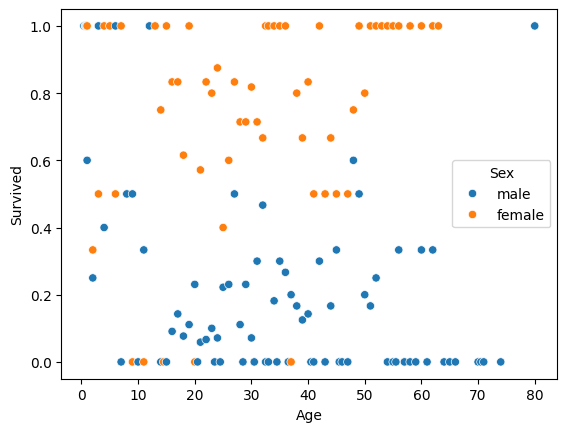

In [23]:
#à utiliser
survivantsAge = df.groupby(["Age", "Sex"])["Survived"].mean().reset_index()
# le reset_index() c pour le transformer en dataframe
sns.scatterplot(x = "Age", y = "Survived", data = survivantsAge , hue = "Sex")

In [22]:
df.groupby(["Sex", "Age"])["Survived"].sum().reset_index().head()

,Sex,Age,Survived
0,female,0.75,2
1,female,1.00,2
2,female,2.00,2
3,female,3.00,1
4,female,4.00,5
